In [4]:
suppressWarnings(suppressMessages({ 
    library(RODBC)
    library(glue)
    library(tidyverse)
    library(DBI)
    library(readxl)
    library(gridExtra)
    library(ggpubr)
}))

In [32]:
zl_user <- "osat"
dsn <- "digger20c-DOCMINER"
con <- odbcConnect(dsn, uid = zl_user, pwd = getPass())
con

In [ ]:
parametry

HbA1c (LabGH), 
čas v cílovém rozmezí 3.9-10 (TIR), 
čas v hyperglykémii (TAR), 
čas v hypoglykémii (TBR), 
hyperglykémie 1.stupně 10-13.9), 
hyperglykémie 2.stupně TAR (>13.9), 
hypoglykémie 1.stupně (3.0-3.9), 
hypoglykémie 2.stupně (<3.0), 
průměrná glykémie (SensGlucoseAVG), 
coefiicent variance (SensGlucoseCV), 
celková denní dávka inzulinu (InsulinDayDoseSUM), 
celková denní dávka inzulinu na kg (CCDIproKgDay), 
bolusový (InsulinDayDoseBolus)
i bazální (InsulinDayDoseBasal) inzulin, 
bolusový i bazální inzulin na kg, inzulinová citlivost (InsulinSensFactor)
a sacharidový poměr (InsulinCarboRatio). 

Z hlediska komplikací a komorbidit jsou parametry 

Art. hypertenze (IsArtHypert), dyslipidémie (IsDyslipid), 
diab. retinopatie (IsDiabetRetin), dialýza (IsDialysis), 
syndrom diabetické nohy (IsSDN), 
sexuální/erektilní dysfunkce (IsErectDysf), 
Kardiovaskulární komplikace (IsKVCompl). 

Ke komplikacím by se také mohla přiřadit kategorie 

eGFR (labGF) < 1 ml/s, která se dá zhodnotit jako marker diabetické nefropatie/chronického onemocnění ledvin).

In [11]:
df <- read_excel("~/datamining-analysis/osat/560 HORL/horl_560.xlsx") 

df_selected <- df %>%
    select(BMI, DiabetTherapy, IsSensor, PumpType, 'HybridClosCircType', '<3','3-3.9','TIR 5','10-13.9','>13.9', 'LabGH', 'TIR', 'TAR', 'TBR', 'SensGlucoseAVG', 'SensGlucoseCV', 'InsulinDayDoseSUM', 'InsulinDayDoseBolus', 'InsulinDayDoseBasal', 'InsulinSensFactor', 'InsulinCarboRatio', 'IsArtHypert', 'IsDyslipid', 'IsDiabetRetin', 'IsDialysis', 'IsSDN', 'IsErectDysf', 'IsKVCompl', 'LabGF', 'SensorType') %>%
    mutate(BMI_char = case_when(BMI< 19 ~ 'Podváha',
                                 BMI >= 19 & BMI < 25 ~ 'Normální váha',
                                 BMI >= 25 & BMI < 30 ~ 'Nadváha',
                                 BMI >= 30 ~ 'Obezita'))%>%
    mutate(LabGF = ifelse(LabGF>50, LabGH/10, LabGF),
           TBR = ifelse(TBR>40, TBR/10, TBR),
           InsulinCarboRatio = ifelse(InsulinCarboRatio>50, InsulinCarboRatio/10, InsulinCarboRatio),
           InsulinSensFactor = ifelse(InsulinSensFactor>40, InsulinSensFactor/10, InsulinSensFactor),
           LabGF = as.numeric(LabGF),
           LabGH = ifelse(LabGH>100, LabGH/10, LabGH),
           LabGF = ifelse(LabGF>100, LabGF/10, LabGF),
           chytra_pumpa = ifelse(is.na(HybridClosCircType)|HybridClosCircType=='žádný', 0, 1)) %>%
    rename(mene_3 = '<3',
           vic_13.9 ='>13.9',
           TIR_5 = 'TIR 5') %>%
    as.data.frame()

names(df)

New names:
• `Today` -> `Today...5`
• `Today` -> `Today...16`
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `LabGF = as.numeric(LabGF)`.
Caused by warning:
! NAs introduced by coercion”


[1] "Cnt"                    "RegYear"                "PatID"                 
 [4] "PatDateOfBirth"         "Today...5"              "days vek"              
 [7] "vek presne"             "vek roky"               "PatSex"                
[10] "IsSensor"               "IrrelevantReason"       "vaha"                  
[13] "vyska"                  "BMI"                    "ManifestDate"          
[16] "Today...16"             "days trvani"            "trvani presne"         
[19] "trvani roky"            "DiabetTherapy"          "PumpType"              
[22] "SensorType"             "HybridClosCircType"     "days smycka"           
[25] "smycka presne"          "smycka roky"            "IsCeliac"              
[28] "IsAutoimThoroid"        "BPSyst"                 "BPDiast"               
[31] "IsArtHypert"            "IsDyslipid"             "IsDiabetRetin"         
[34] "IsDialysis"             "IsSDN"                  "IsErectDysf"           
[37] "IsKVCompl"              "IsTXKidney"             "IsTXInsProdTiss"       
[40] "IsPsychDg"              "Medikace"               "SensInRangePar"        
[43] "SensInRangeParBandSpec" "<3"                     "3-3.9"                 
[46] "TIR 5"                  "10-13.9"                ">13.9"                 
[49] "TBR"                    "TIR"                    "TAR"                   
[52] "SensOtherPar"           "SensGlucoseAVG"         "SensGlucoseCV"         
[55] "SensGlocoseSD"          "InsulinTherapyPar"      "InsulinDayDoseSUM"     
[58] "InsulinDayDoseBasal"    "InsulinDayDoseBolus"    "InsulinCarboRatio"     
[61] "InsulinSensFactor"      "InsulinFinalGlyc"       "InsulinActive"         
[64] "Smoking"                "NonRecHypoglSynd"       "SevereHypoglNum"       
[67] "SevereDiabKetoNum"      "LabGH"                  "LabGF"

In [6]:
summary(df_selected)

      BMI        DiabetTherapy        IsSensor           PumpType        
 Min.   :14.20   Length:2043        Length:2043        Length:2043       
 1st Qu.:23.20   Class :character   Class :character   Class :character  
 Median :25.80   Mode  :character   Mode  :character   Mode  :character  
 Mean   :26.43                                                           
 3rd Qu.:29.10                                                           
 Max.   :51.00                                                           
                                                                         
 HybridClosCircType     mene_3           3-3.9            TIR_5       
 Length:2043        Min.   : 0.000   Min.   : 0.000   Min.   :  0.00  
 Class :character   1st Qu.: 0.000   1st Qu.: 1.000   1st Qu.: 58.00  
 Mode  :character   Median : 0.000   Median : 2.000   Median : 71.00  
                    Mean   : 0.822   Mean   : 3.168   Mean   : 67.61  
                    3rd Qu.: 1.000   3rd Qu.: 4.000  

### Correlation

#### All 

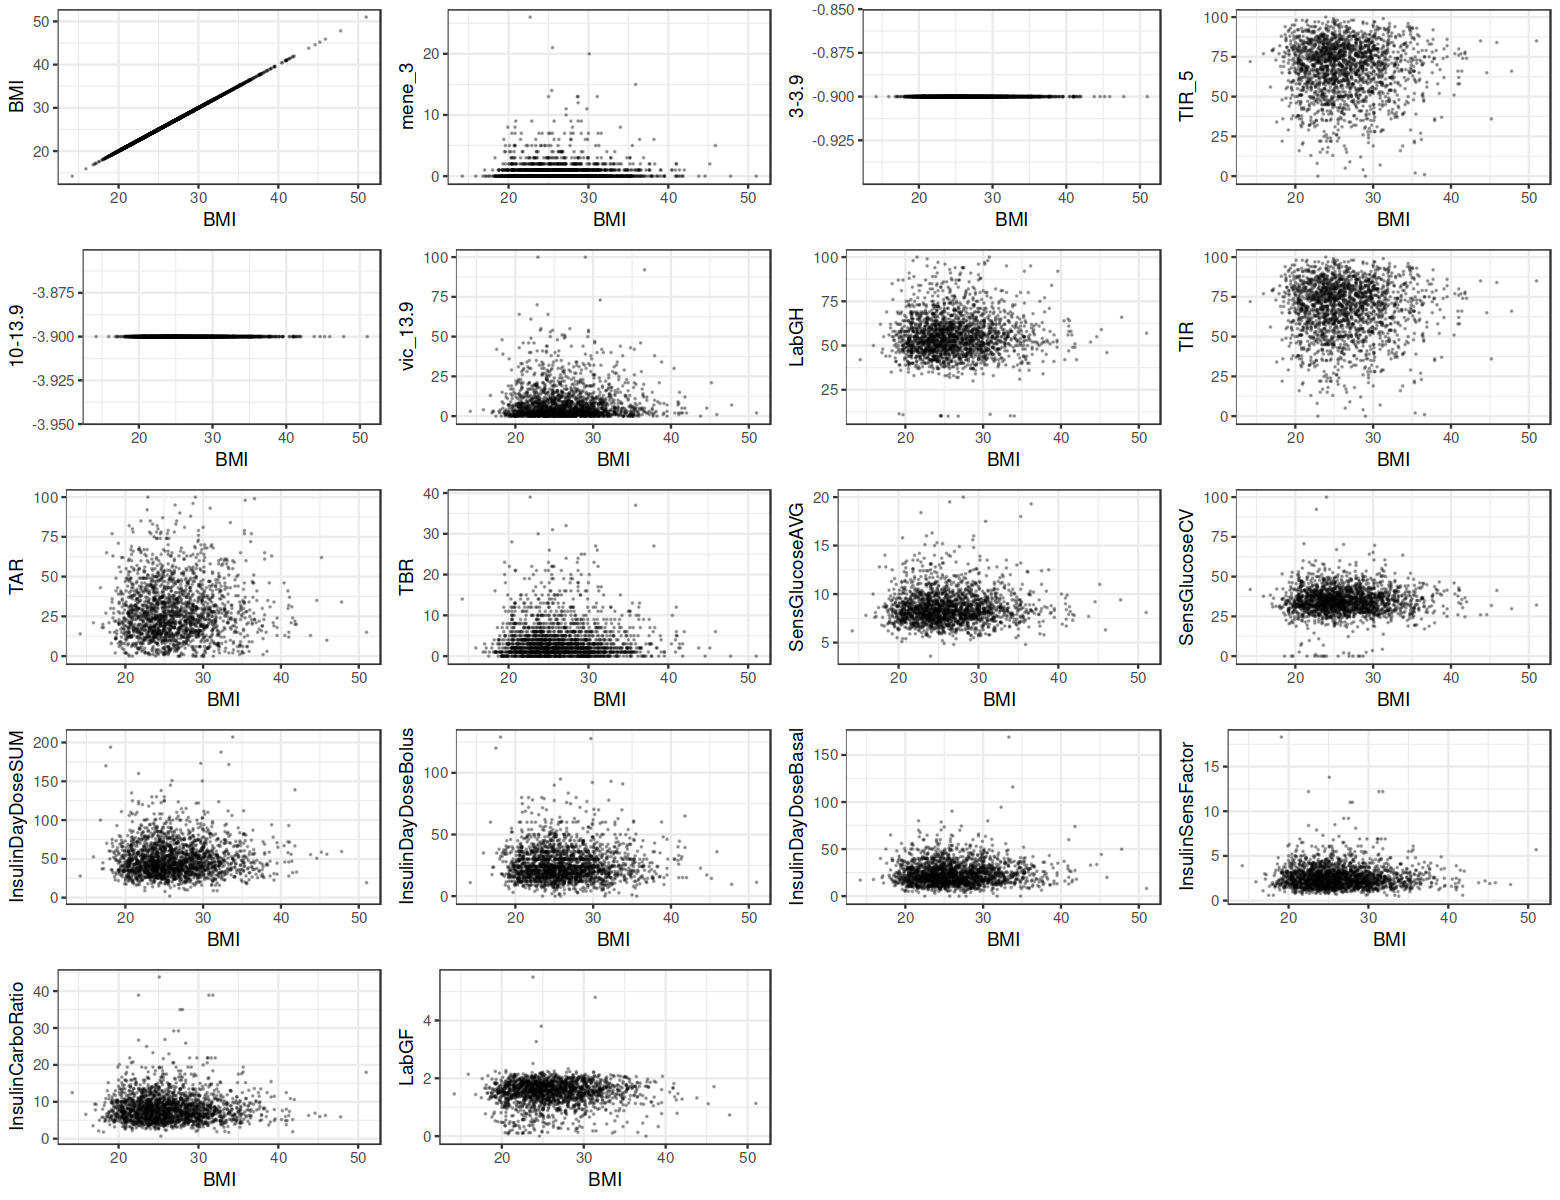

In [27]:
options(repr.plot.width=13, repr.plot.height=10)

plots <- lapply(names(df_selected %>% 
                         select_if(is.numeric) %>%
                         mutate_all(as.numeric)), function(col_name) {
    
  df_selected %>% 
    select_if(is.numeric) %>%
    mutate_all(as.numeric) %>%
    ggplot(aes_string(y = col_name, x = "BMI")) +
    geom_point(alpha = 0.3, size = 0.005) +
    geom_smooth(method = "lm", se = F, size=.7cv) +
    labs(y = col_name) +
    theme_bw() + 
    theme(legend.position="none") 
})

suppressWarnings(suppressMessages({ 
    do.call(grid.arrange, plots)
}))

In [101]:
sapply(df_selected%>%select_if(is.numeric), function(x) cor.test(x, df_selected%>%pull(BMI))$p.value)

BMI              mene_3               3-3.9               TIR_5 
          0.0000000           0.9081144           0.7996800           0.4509313 
            10-13.9            vic_13.9               LabGH                 TIR 
          0.4067859           0.6228814           0.2035551           0.4866619 
                TAR                 TBR      SensGlucoseAVG       SensGlucoseCV 
          0.4547296           0.4290783           0.3981205           0.7967241 
  InsulinDayDoseSUM InsulinDayDoseBolus InsulinDayDoseBasal   InsulinSensFactor 
          0.5293769           0.7079132           0.1173073           0.3744169 
  InsulinCarboRatio               LabGF 
          0.6472842           0.5720060

#### Sensor (Y VS N)

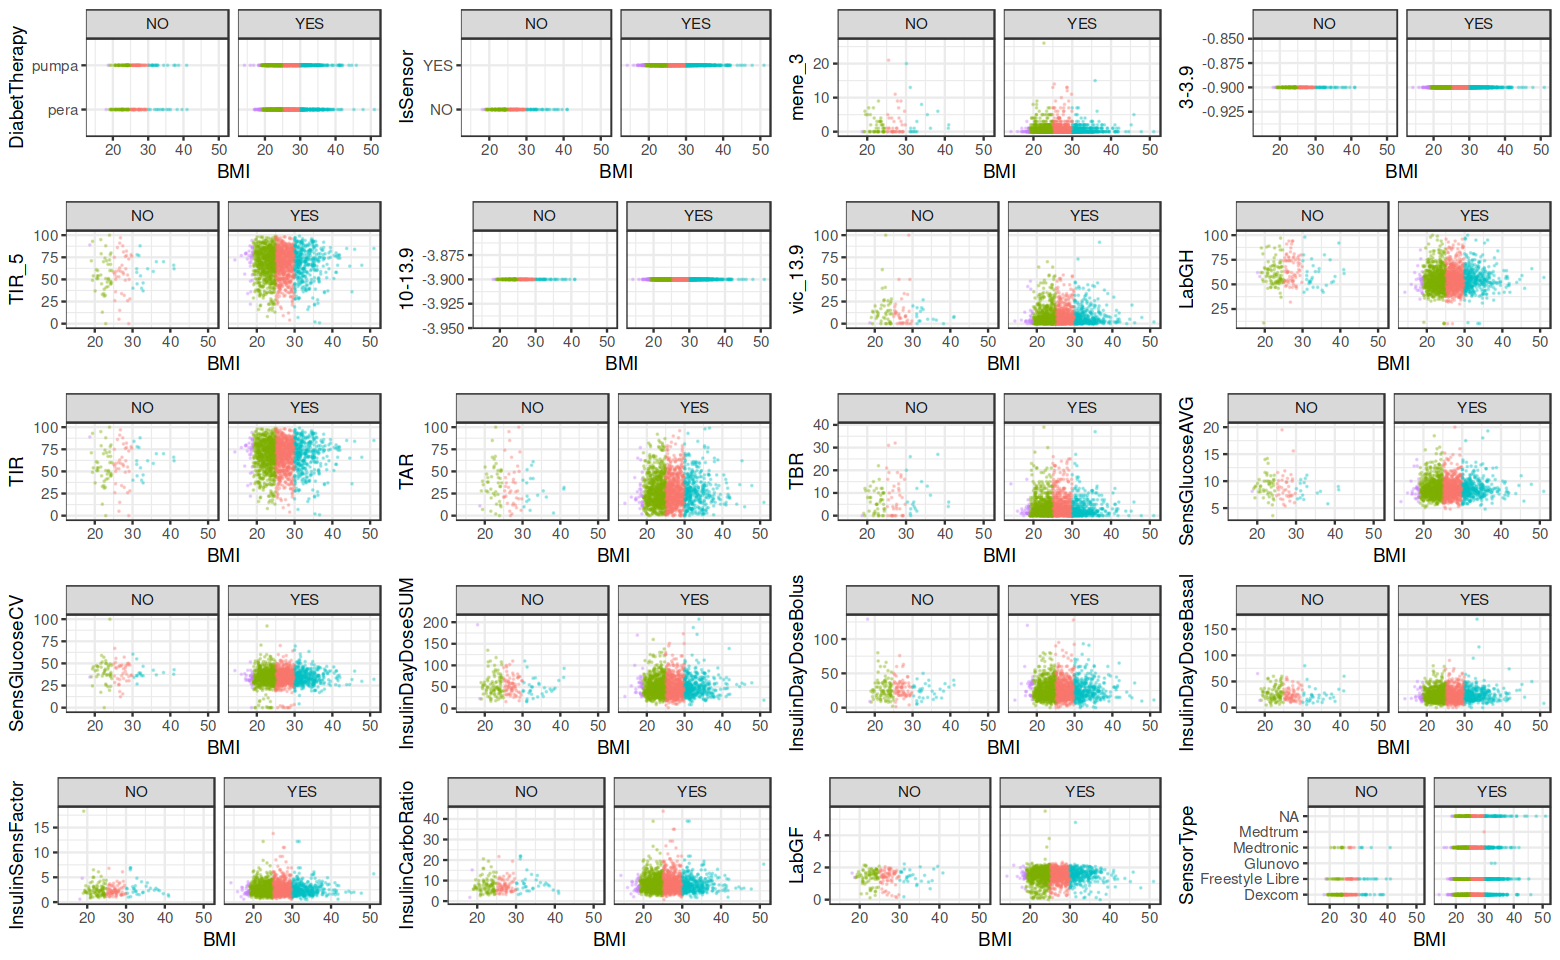

In [113]:
options(repr.plot.width=13, repr.plot.height=8)


plots <- lapply(names(df_selected%>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl','BMI_char','BMI'))), function(col_name) {
    
  df_selected %>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')) %>%
    ggplot(aes_string(y = col_name, x = "BMI", col='BMI_char')) +
    geom_point(alpha = 0.3, size = 0.005) +
    # geom_smooth(method = "lm", se = F, size=.7) +
    labs(y = col_name) +
    theme_bw() + 
    theme(legend.position="none") +
    facet_wrap(~IsSensor)
})

suppressWarnings(suppressMessages({ 
    do.call(grid.arrange, plots)
}))

In [109]:
as.list(sapply(df_selected%>%filter(IsSensor=='YES')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(IsSensor=='YES')%>%pull(BMI))$p.value, 2)))
               
as.list(sapply(df_selected%>%filter(IsSensor=='NO')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(IsSensor=='NO')%>%pull(BMI))$p.value, 2)))

$BMI
[1] 0

$mene_3
[1] 0.83

$`3-3.9`
[1] 0.59

$TIR_5
[1] 0.29

$`10-13.9`
[1] 0.31

$vic_13.9
[1] 0.32

$LabGH
[1] 0.13

$TIR
[1] 0.31

$TAR
[1] 0.25

$TBR
[1] 0.22

$SensGlucoseAVG
[1] 0.22

$SensGlucoseCV
[1] 0.63

$InsulinDayDoseSUM
[1] 0.23

$InsulinDayDoseBolus
[1] 0.89

$InsulinDayDoseBasal
[1] 0.04

$InsulinSensFactor
[1] 0.44

$InsulinCarboRatio
[1] 0.43

$LabGF
[1] 0.61

$BMI
[1] 0

$mene_3
[1] 0.35

$`3-3.9`
[1] 0.2

$TIR_5
[1] 0.58

$`10-13.9`
[1] 0.63

$vic_13.9
[1] 0.37

$LabGH
[1] 0.75

$TIR
[1] 0.5

$TAR
[1] 0.29

$TBR
[1] 0.19

$SensGlucoseAVG
[1] 0.35

$SensGlucoseCV
[1] 0.89

$InsulinDayDoseSUM
[1] 0.21

$InsulinDayDoseBolus
[1] 0.19

$InsulinDayDoseBasal
[1] 0.43

$InsulinSensFactor
[1] 0.61

$InsulinCarboRatio
[1] 0.42

$LabGF
[1] 0.97

#### Pumpa VS Pera

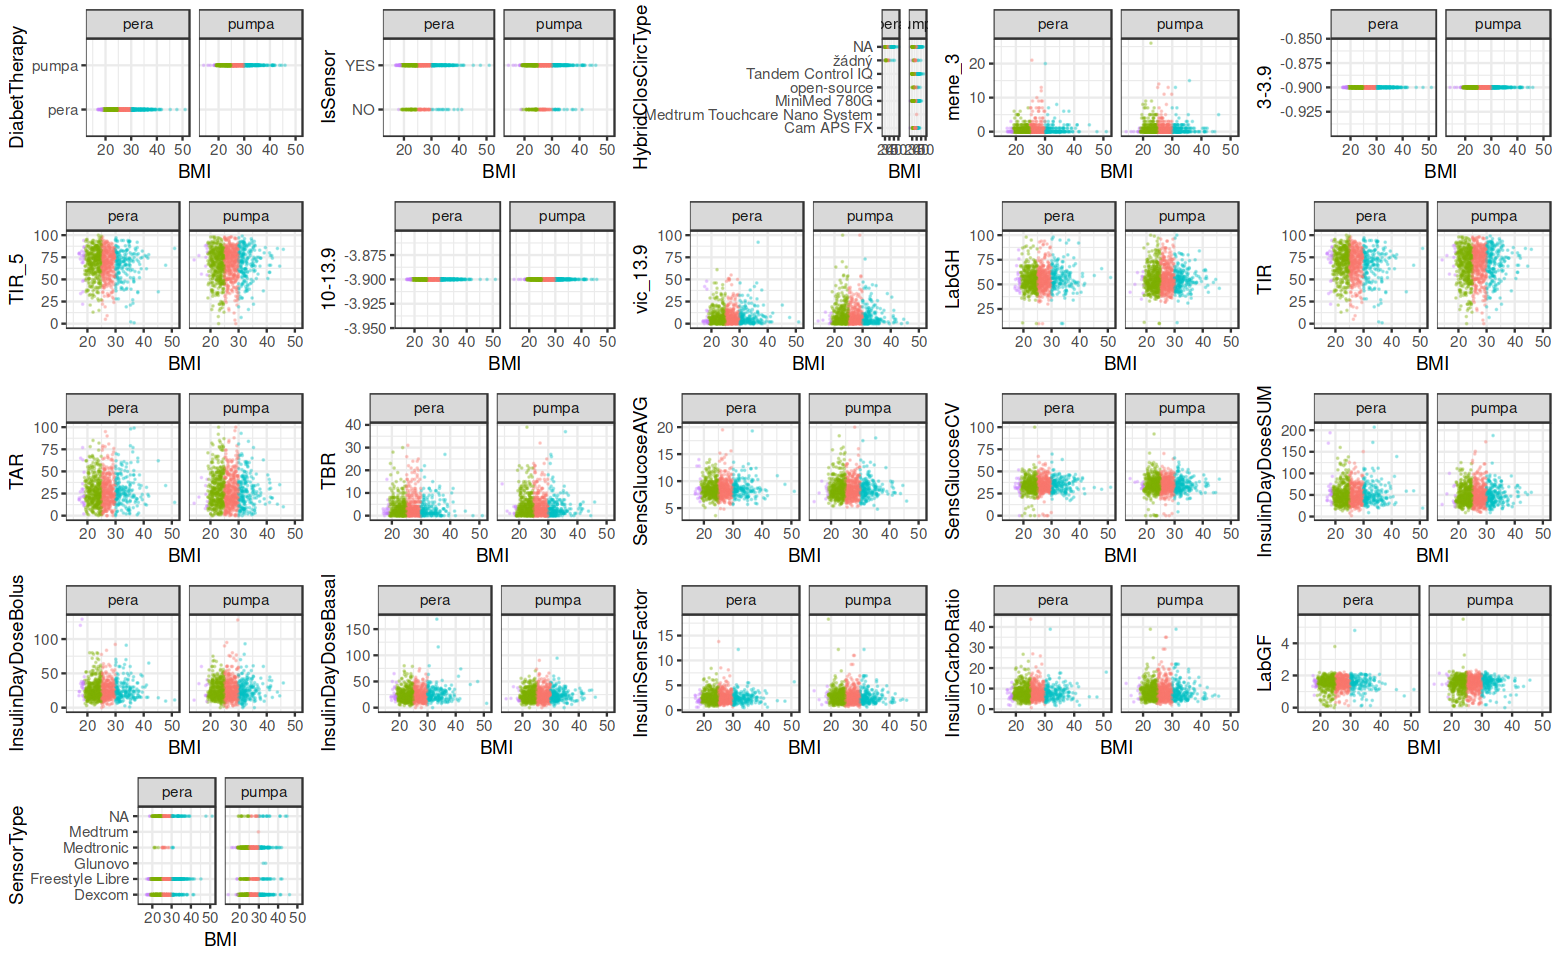

In [30]:
options(repr.plot.width=13, repr.plot.height=8)


plots <- lapply(names(df_selected%>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl','BMI_char','BMI'))), function(col_name) {
    
  df_selected %>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')) %>%
    ggplot(aes_string(y = col_name, x = "BMI", col='BMI_char')) +
    geom_point(alpha = 0.3, size = 0.005) +
    # geom_smooth(method = "lm", se = F, size=.7) +
    labs(y = col_name) +
    theme_bw() + 
    theme(legend.position="none") +
    facet_wrap(~DiabetTherapy)
})

suppressWarnings(suppressMessages({ 
    do.call(grid.arrange, plots)
}))

In [31]:
as.list(sapply(df_selected%>%filter(DiabetTherapy=='pera')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(DiabetTherapy=='pera')%>%pull(BMI))$p.value,2)))
       
as.list(sapply(df_selected%>%filter(DiabetTherapy=='pumpa')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(DiabetTherapy=='pumpa')%>%pull(BMI))$p.value, 2)))

$BMI
[1] 0

$mene_3
[1] 0.2

$`3-3.9`
[1] 0.53

$TIR_5
[1] 0.13

$`10-13.9`
[1] 0.46

$vic_13.9
[1] 0.18

$LabGH
[1] 0.11

$TIR
[1] 0.13

$TAR
[1] 0.22

$TBR
[1] 0.79

$SensGlucoseAVG
[1] 0.38

$SensGlucoseCV
[1] 0.18

$InsulinDayDoseSUM
[1] 0.78

$InsulinDayDoseBolus
[1] 0.25

$InsulinDayDoseBasal
[1] 0.09

$InsulinSensFactor
[1] 0.67

$InsulinCarboRatio
[1] 0.69

$LabGF
[1] 0.96

$BMI
[1] 0

$mene_3
[1] 0.28

$`3-3.9`
[1] 0.24

$TIR_5
[1] 0.69

$`10-13.9`
[1] 0.64

$vic_13.9
[1] 0.6

$LabGH
[1] 0.81

$TIR
[1] 0.63

$TAR
[1] 0.91

$TBR
[1] 0.17

$SensGlucoseAVG
[1] 0.74

$SensGlucoseCV
[1] 0.34

$InsulinDayDoseSUM
[1] 0.51

$InsulinDayDoseBolus
[1] 0.51

$InsulinDayDoseBasal
[1] 0.64

$InsulinSensFactor
[1] 0.4

$InsulinCarboRatio
[1] 0.76

$LabGF
[1] 0.46

#### Sensor type

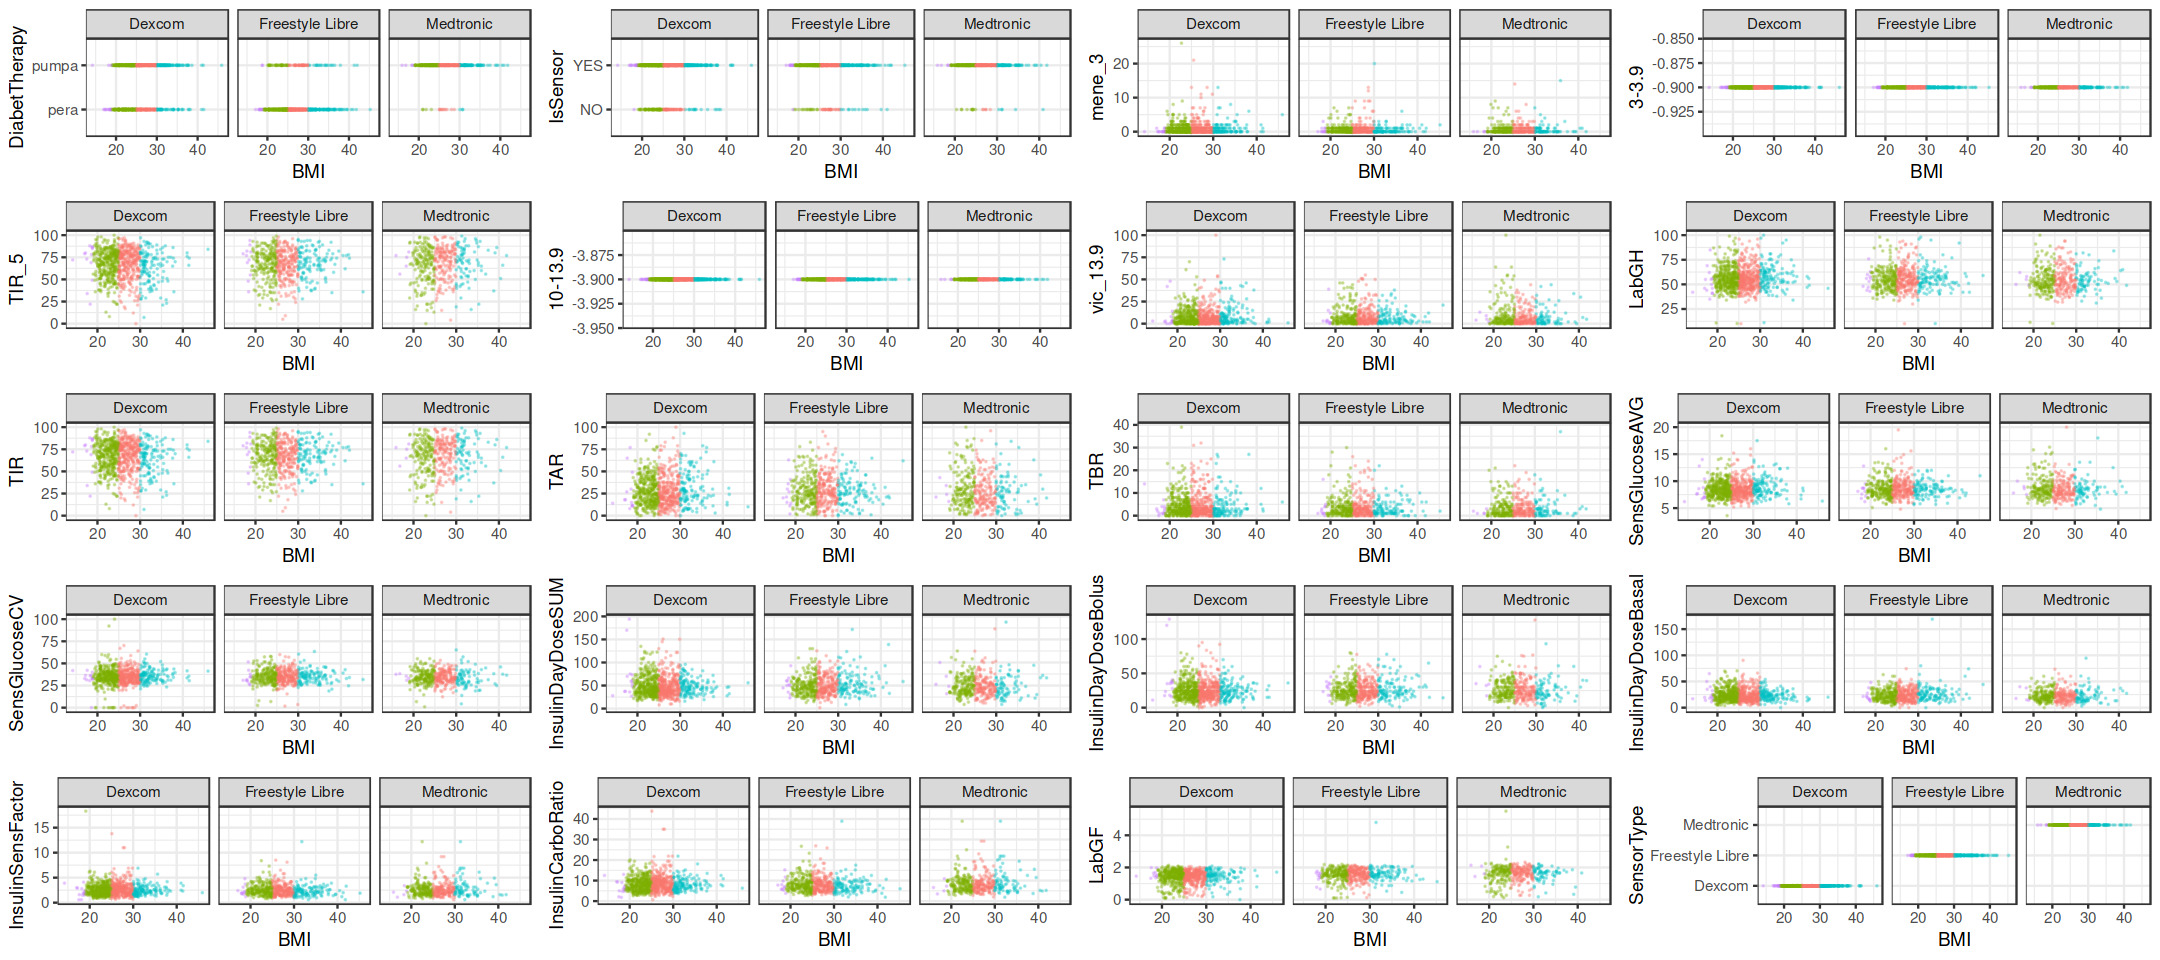

In [110]:
options(repr.plot.width=18, repr.plot.height=8)


plots <- lapply(names(df_selected%>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl','BMI_char','BMI'))), function(col_name) {
    
  df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum') %>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')) %>%
    ggplot(aes_string(y = col_name, x = "BMI", col='BMI_char')) +
    geom_point(alpha = 0.3, size = 0.005) +
    # geom_smooth(method = "lm", se = F, size=.7) +
    labs(y = col_name) +
    theme_bw() + 
    theme(legend.position="none") +
    facet_wrap(~SensorType)
})

suppressWarnings(suppressMessages({ 
    do.call(grid.arrange, plots)
}))

In [32]:
as.list(sapply(df_selected%>%filter(SensorType=='Dexcom')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(SensorType=='Dexcom')%>%pull(BMI))$p.value, 2)))
       
as.list(sapply(df_selected%>%filter(SensorType=='Freestyle Libre')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(SensorType=='Freestyle Libre')%>%pull(BMI))$p.value, 2)))
       
as.list(sapply(df_selected%>%filter(SensorType=='Medtronic')%>%select_if(is.numeric), function(x) round(cor.test(x, df_selected%>%filter(SensorType=='Medtronic')%>%pull(BMI))$p.value, 2)))

$BMI
[1] 0

$mene_3
[1] 0.48

$`3-3.9`
[1] 0.92

$TIR_5
[1] 0.05

$`10-13.9`
[1] 0.24

$vic_13.9
[1] 0.07

$LabGH
[1] 0.09

$TIR
[1] 0.07

$TAR
[1] 0.08

$TBR
[1] 0.9

$SensGlucoseAVG
[1] 0.08

$SensGlucoseCV
[1] 0.19

$InsulinDayDoseSUM
[1] 0.1

$InsulinDayDoseBolus
[1] 0.16

$InsulinDayDoseBasal
[1] 0.15

$InsulinSensFactor
[1] 0.82

$InsulinCarboRatio
[1] 0.51

$LabGF
[1] 0.8

$BMI
[1] 0

$mene_3
[1] 0.69

$`3-3.9`
[1] 0.37

$TIR_5
[1] 0.77

$`10-13.9`
[1] 0.69

$vic_13.9
[1] 0.55

$LabGH
[1] 0.66

$TIR
[1] 0.81

$TAR
[1] 0.93

$TBR
[1] 0.58

$SensGlucoseAVG
[1] 0.59

$SensGlucoseCV
[1] 0.89

$InsulinDayDoseSUM
[1] 0.02

$InsulinDayDoseBolus
[1] 0.25

$InsulinDayDoseBasal
[1] 0.01

$InsulinSensFactor
[1] 0.11

$InsulinCarboRatio
[1] 0.09

$LabGF
[1] 0.52

$BMI
[1] 0

$mene_3
[1] 0.92

$`3-3.9`
[1] 0.71

$TIR_5
[1] 0.31

$`10-13.9`
[1] 0.71

$vic_13.9
[1] 0.19

$LabGH
[1] 0.84

$TIR
[1] 0.3

$TAR
[1] 0.28

$TBR
[1] 0.8

$SensGlucoseAVG
[1] 0.44

$SensGlucoseCV
[1] 0.55

$InsulinDayDoseSUM
[1] 0.96

$InsulinDayDoseBolus
[1] 0.84

$InsulinDayDoseBasal
[1] 0.87

$InsulinSensFactor
[1] 0.37

$InsulinCarboRatio
[1] 0.4

$LabGF
[1] 0.76

#### chytré pumpy VS  hloupé

In [7]:
table(df_selected$chytra_pumpa, df_selected$DiabetTherapy)

   
    pera pumpa
  0  971   228
  1    0   844

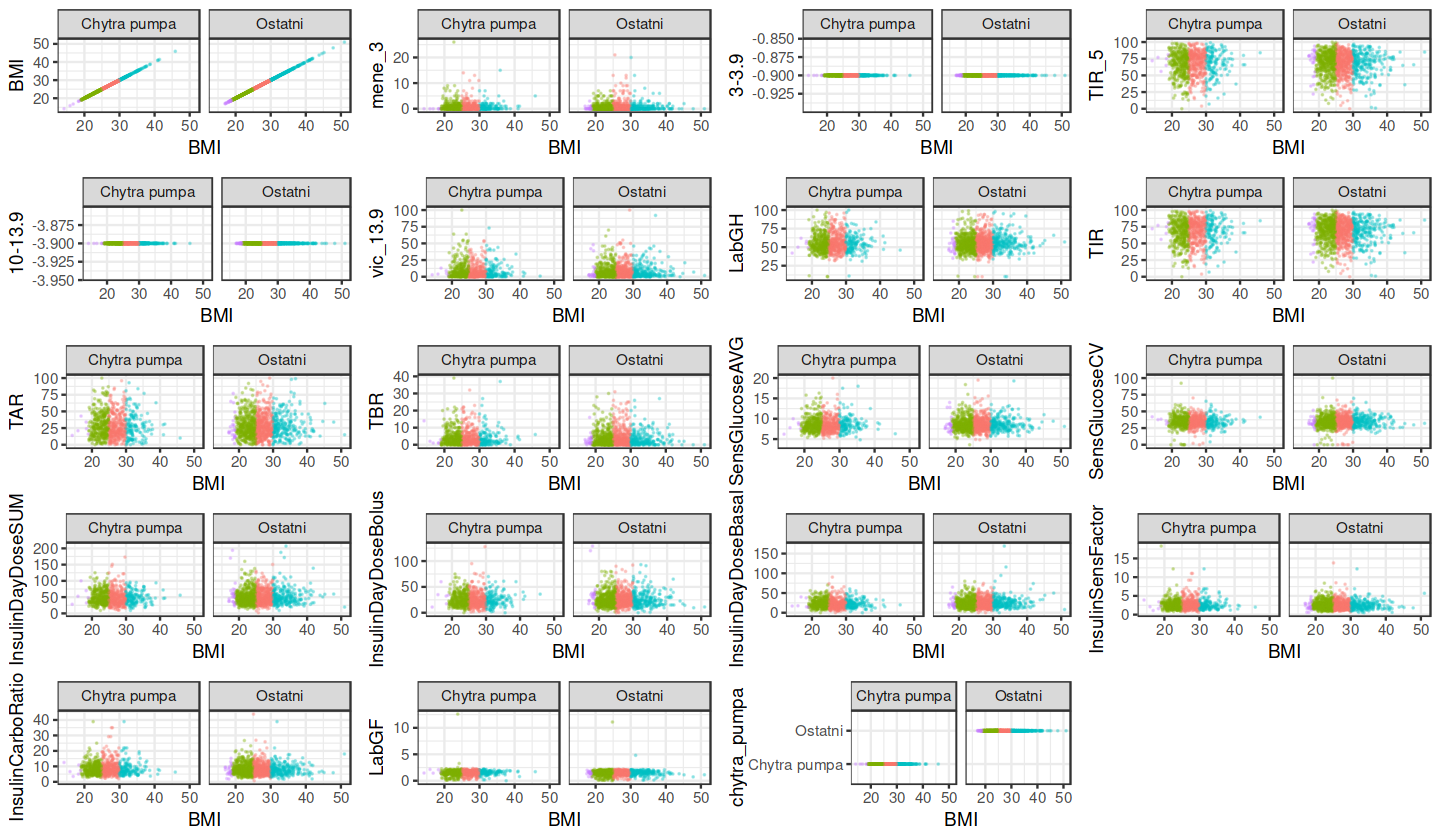

In [21]:
options(repr.plot.width=12, repr.plot.height=7)

plots <- lapply(names(df_selected %>% 
    select_if(is.numeric)), function(col_name) {
    
  df_selected %>% 
    select(-c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl'),
              -DiabetTherapy, -PumpType, -HybridClosCircType, -SensorType) %>%
    mutate(chytra_pumpa = ifelse(chytra_pumpa==0, 'Ostatni', 'Chytra pumpa')) %>%
    ggplot(aes_string(y = col_name, x = "BMI", col='BMI_char')) +
    geom_point(alpha = 0.3, size = 0.005) +
    # geom_smooth(method = "lm", se = F, size=.7) +
    labs(y = col_name) +
    theme_bw() + 
    theme(legend.position="none") +
    facet_wrap(~chytra_pumpa)
})

suppressWarnings(suppressMessages({ 
    do.call(grid.arrange, plots)
}))

In [10]:
as.list(sapply(df_selected%>%filter(chytra_pumpa==1)%>%select_if(is.numeric), 
               function(x) round(cor.test(x, df_selected%>%filter(chytra_pumpa==1)%>%pull(BMI))$p.value, 2)))
       
as.list(sapply(df_selected%>%filter(chytra_pumpa==0)%>%select_if(is.numeric), 
               function(x) round(cor.test(x, df_selected%>%filter(chytra_pumpa==0)%>%pull(BMI))$p.value, 2)))


Warning message in cor(x, y):
“the standard deviation is zero”


$BMI
[1] 0

$mene_3
[1] 0.84

$`3-3.9`
[1] 0.5

$TIR_5
[1] 0.84

$`10-13.9`
[1] 0.58

$vic_13.9
[1] 0.55

$LabGH
[1] 0.82

$TIR
[1] 0.77

$TAR
[1] 0.9

$TBR
[1] 0.56

$SensGlucoseAVG
[1] 0.59

$SensGlucoseCV
[1] 0.32

$InsulinDayDoseSUM
[1] 0.71

$InsulinDayDoseBolus
[1] 0.98

$InsulinDayDoseBasal
[1] 0.49

$InsulinSensFactor
[1] 0.93

$InsulinCarboRatio
[1] 0.55

$LabGF
[1] 0.47

$chytra_pumpa
[1] NA

Warning message in cor(x, y):
“the standard deviation is zero”


$BMI
[1] 0

$mene_3
[1] 0.7

$`3-3.9`
[1] 0.88

$TIR_5
[1] 0.23

$`10-13.9`
[1] 0.55

$vic_13.9
[1] 0.22

$LabGH
[1] 0.14

$TIR
[1] 0.25

$TAR
[1] 0.28

$TBR
[1] 0.63

$SensGlucoseAVG
[1] 0.51

$SensGlucoseCV
[1] 0.28

$InsulinDayDoseSUM
[1] 0.35

$InsulinDayDoseBolus
[1] 0.65

$InsulinDayDoseBasal
[1] 0.03

$InsulinSensFactor
[1] 0.3

$InsulinCarboRatio
[1] 0.31

$LabGF
[1] 0.7

$chytra_pumpa
[1] NA

### Diagnozy

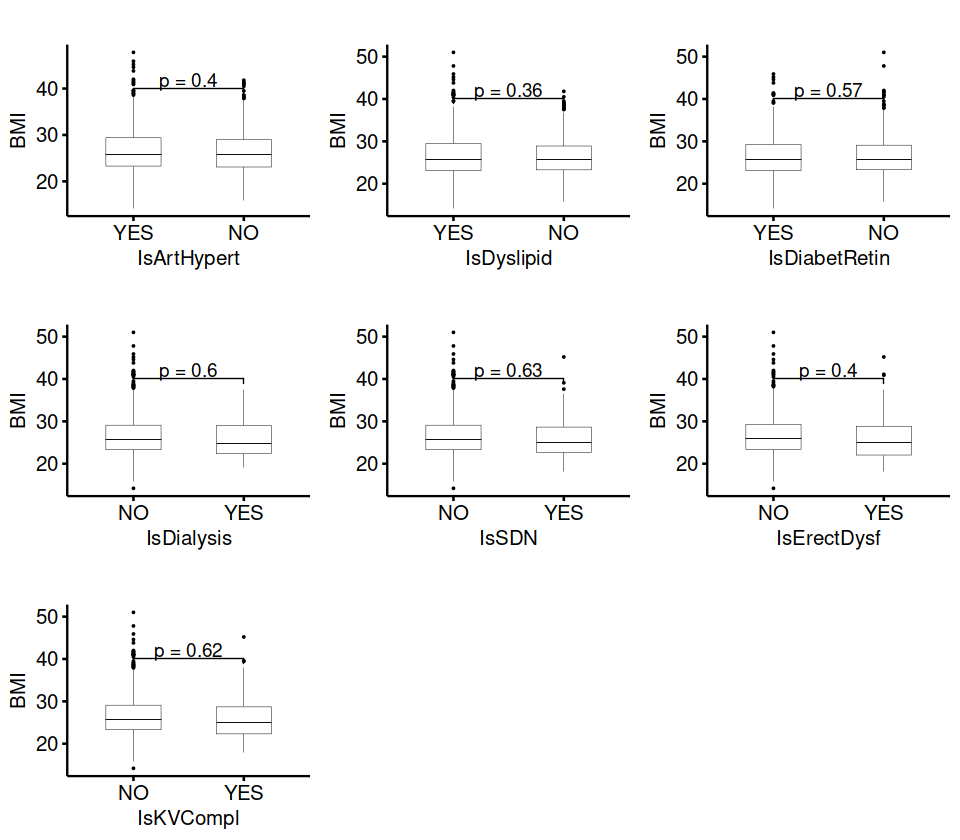

In [416]:
options(repr.plot.width=8, repr.plot.height=7)

stat_pval_plot_func <- function(col) {
    test <- compare_means(BMI ~ IsArtHypert, 
                          df_selected%>%filter(!is.na(!!sym(col))), 
                          method = 't.test') %>%
     mutate(y.position = c(40))

    ggboxplot(df_selected%>%filter(!is.na(!!sym(col))), 
              x={{col}}, y="BMI", 
              title = "", xlab = {{col}}, ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
        stat_pvalue_manual(test, label = "p = {p.adj}")
}


plot <- map(is_cols, stat_pval_plot_func)
do.call(grid.arrange, plot)

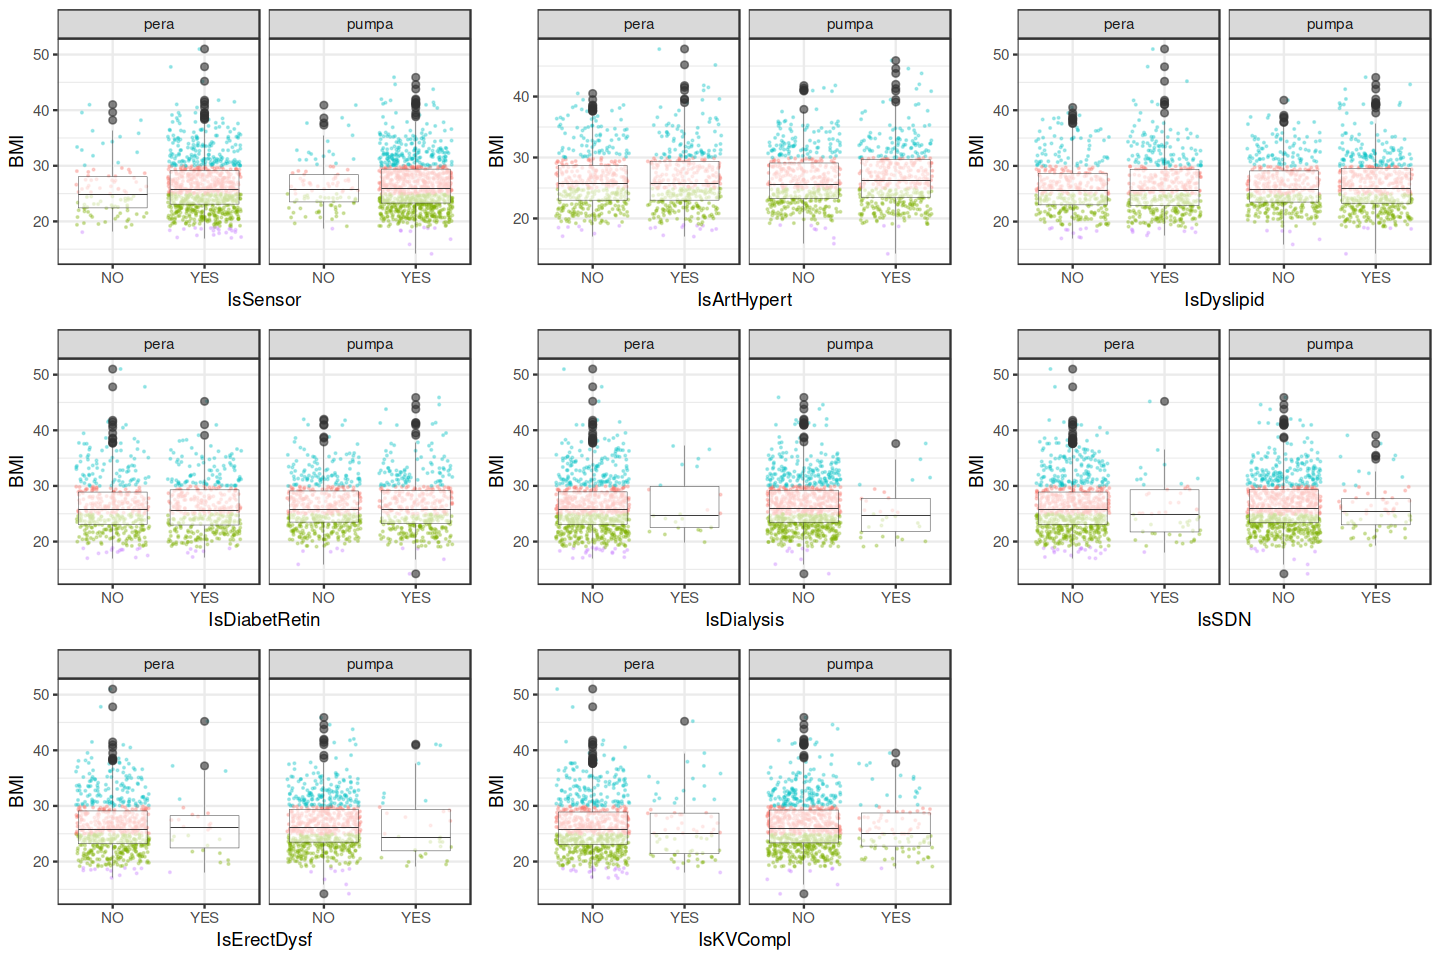

In [91]:
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
plot <- list()

plot_fun <- function(col, w=8, h=8) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    plot <- df_selected %>% 
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(x = !!sym(col), y = BMI)) +
    geom_jitter(alpha = 0.3, size = 0.1, aes(col=BMI_char)) +
    geom_boxplot(size=.1, alpha=.6) +
    theme_bw() + 
    theme(legend.position="none") +
    facet_wrap(~DiabetTherapy)
    
    return(plot)
}

plot <- map(is_cols, plot_fun, w=12)
do.call(grid.arrange, plot)

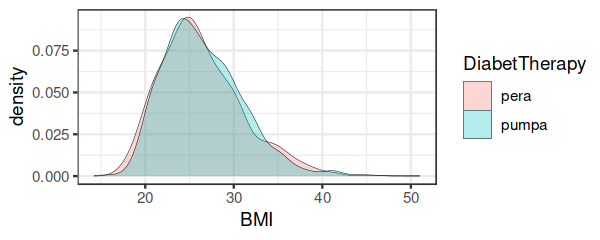

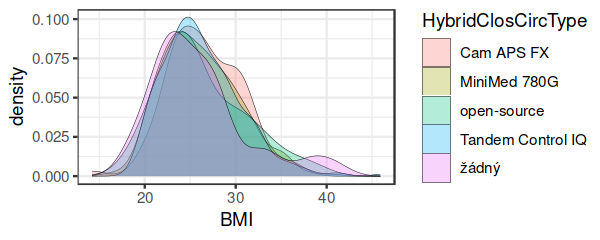

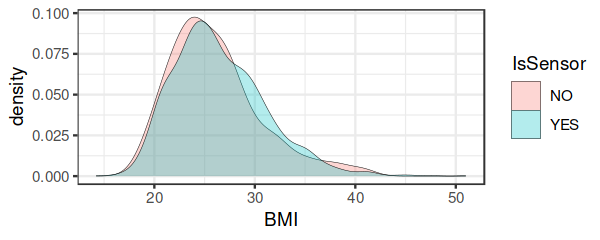

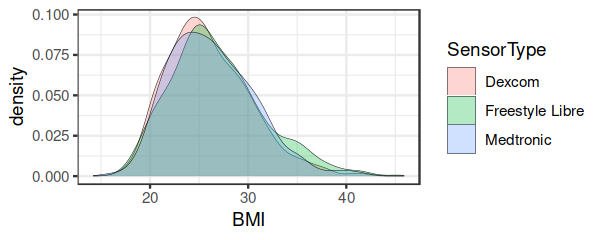

In [117]:
options(repr.plot.width=5, repr.plot.height=2)

df_selected %>%
    ggplot(aes(BMI, fill=DiabetTherapy)) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw()

df_selected %>% 
    filter(HybridClosCircType!='Medtrum Touchcare Nano System') %>%
    ggplot(aes(BMI, fill=HybridClosCircType)) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw()

df_selected %>%
    ggplot(aes(BMI, fill=IsSensor)) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw()

df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum') %>%
    ggplot(aes(BMI, fill=SensorType)) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw()

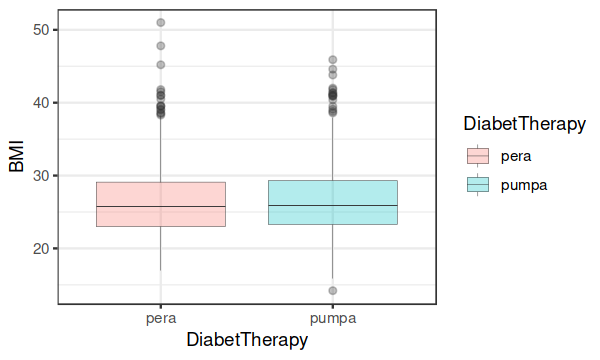

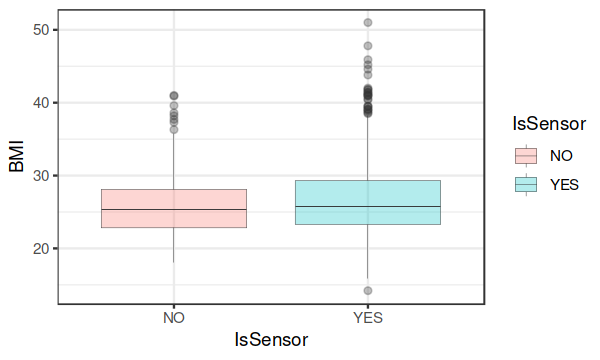

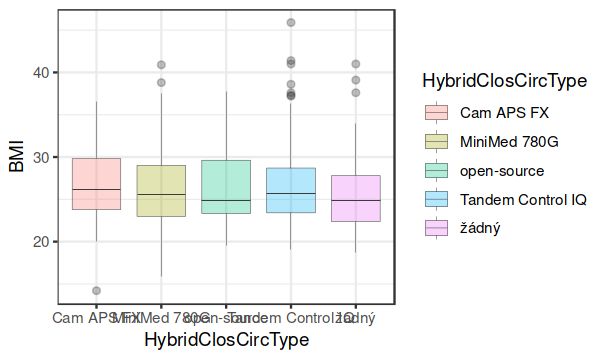

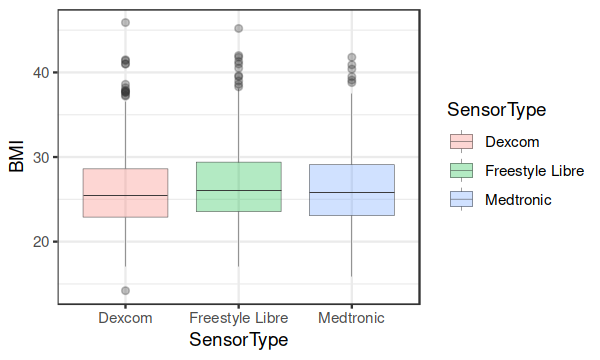

In [65]:
options(repr.plot.width=5, repr.plot.height=3)

df_selected %>%
    ggplot(aes(x=DiabetTherapy, y=BMI, fill=DiabetTherapy)) +
    geom_boxplot(alpha = 0.3, size = 0.1) +
    theme_bw() 

df_selected %>%
    ggplot(aes(x=IsSensor, y=BMI, fill=IsSensor)) +
    geom_boxplot(alpha = 0.3, size = 0.1) +
    theme_bw() 

df_selected %>% 
    filter(HybridClosCircType!='Medtrum Touchcare Nano System') %>%
    ggplot(aes(x=HybridClosCircType, y=BMI, fill=HybridClosCircType)) +
    geom_boxplot(alpha = 0.3, size = 0.1) +
    theme_bw() 

df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum') %>%
    ggplot(aes(x=SensorType, y=BMI, fill=SensorType)) +
    geom_boxplot(alpha = 0.3, size = 0.1) +
    theme_bw() 

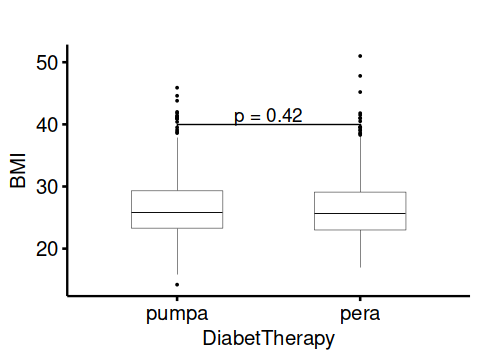

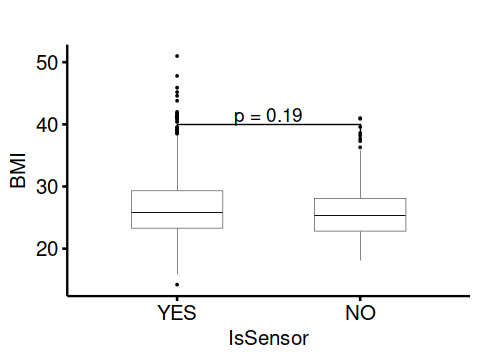

In [67]:
options(repr.plot.width=4, repr.plot.height=3)

test <- compare_means(BMI ~ DiabetTherapy, 
                      df_selected,
                          method = 't.test') %>%
     mutate(y.position = c(40))

ggboxplot(df_selected, 
              x="DiabetTherapy", y="BMI", 
              title = "", xlab = "DiabetTherapy", ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
        stat_pvalue_manual(test, label = "p = {p.adj}")

test <- compare_means(BMI ~ IsSensor, 
                      df_selected,
                          method = 't.test') %>%
     mutate(y.position = c(40))

ggboxplot(df_selected, 
              x="IsSensor", y="BMI", 
              title = "", xlab = "IsSensor", ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
        stat_pvalue_manual(test, label = "p = {p.adj}")

.y. group1 group2            p         p.adj p.format p.signif method
1 BMI žádný  Cam APS FX        0.4480383 1     0.45     ns       T-test
2 BMI žádný  MiniMed 780G      0.7915140 1     0.79     ns       T-test
3 BMI žádný  open-source       0.7942109 1     0.79     ns       T-test
4 BMI žádný  Tandem Control IQ 0.6984565 1     0.70     ns       T-test

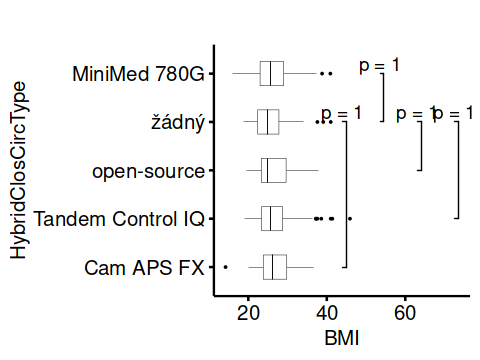

In [113]:
options(repr.plot.width=4, repr.plot.height=3)

test <- compare_means(BMI ~ HybridClosCircType, 
                      df_selected %>% 
                          filter(HybridClosCircType!='Medtrum Touchcare Nano System') %>%
                          mutate(HybridClosCircType = as.factor(HybridClosCircType)),
                          method = 't.test', , ref.group = "žádný")

test

ggboxplot(df_selected %>% 
    filter(HybridClosCircType!='Medtrum Touchcare Nano System'), 
              x="HybridClosCircType", y="BMI", 
              title = "", xlab = "HybridClosCircType", ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
  stat_pvalue_manual(
    test, 
    y.position = 45, step.increase = 0.3,
    label = "p = {p.adj}"
    ) +
    coord_flip()

SensorType      mean(BMI) sd(BMI) 
1 Dexcom          25.97826  4.278525
2 Freestyle Libre 26.79895  4.734420
3 Medtronic       26.31226  4.321275

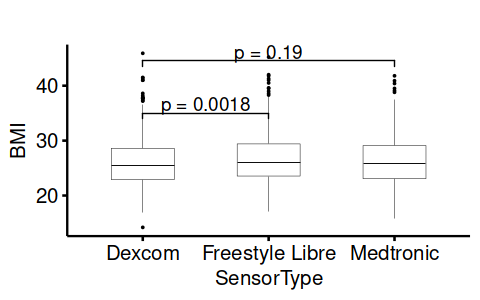

In [120]:
options(repr.plot.width=4, repr.plot.height=2.5)

test <- compare_means(BMI ~ SensorType, 
                      df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum'),
                          method = 't.test', ref.group = "Dexcom")

ggboxplot(df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum'), 
              x="SensorType", y="BMI", 
              title = "", xlab = "SensorType", ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
  stat_pvalue_manual(
    test, 
    y.position = 35, step.increase = .3,
    label = "p = {p.adj}"
    )


df_selected %>% 
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum') %>% 
    group_by(SensorType) %>%
    summarise(mean(BMI),sd(BMI))


         Dexcom Freestyle Libre         Glunovo       Medtronic         Medtrum 
            851             571               2             424               1 

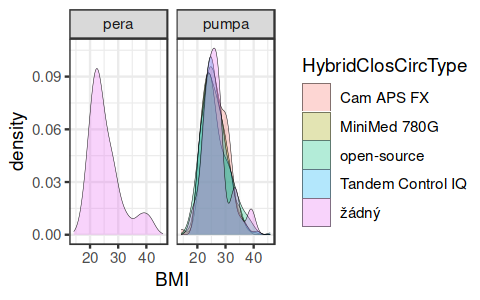

In [121]:
df_selected %>% 
    filter(HybridClosCircType!='Medtrum Touchcare Nano System') %>%
    ggplot(aes(BMI, fill=HybridClosCircType)) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() +
    facet_wrap(~DiabetTherapy)

table(df_selected$SensorType)

In [11]:
df_selected <- df_selected %>%
    mutate(across(starts_with('Is'), ~ ifelse(. =='NA', NA, .)))

.y. group1 group2            p         p.adj p.format p.signif method
1 BMI žádný  Cam APS FX        0.4480383 1     0.45     ns       T-test
2 BMI žádný  MiniMed 780G      0.7915140 1     0.79     ns       T-test
3 BMI žádný  open-source       0.7942109 1     0.79     ns       T-test
4 BMI žádný  Tandem Control IQ 0.6984565 1     0.70     ns       T-test

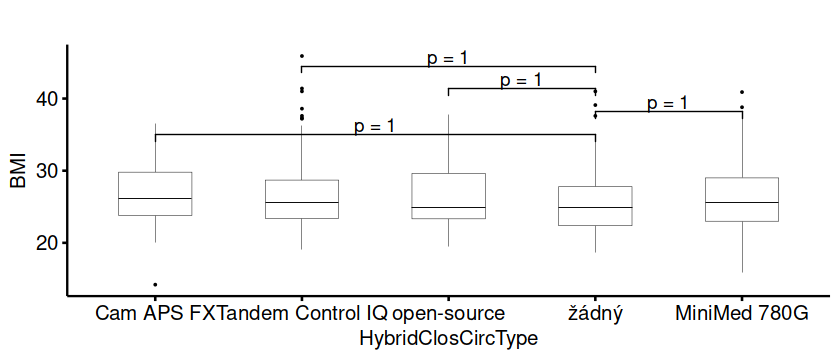

In [97]:
options(repr.plot.width=7, repr.plot.height=3)

test <- compare_means(BMI ~ HybridClosCircType, 
                      df_selected %>% 
                          filter(HybridClosCircType!='Medtrum Touchcare Nano System') %>%
                          mutate(HybridClosCircType = as.factor(HybridClosCircType)),
                          method = 't.test', , ref.group = "žádný")

test

ggboxplot(df_selected %>% 
    filter(HybridClosCircType!='Medtrum Touchcare Nano System'), 
              x="HybridClosCircType", y="BMI", 
              title = "", xlab = "HybridClosCircType", ylab = "BMI",
              width = .5, size=.1, outlier.size=.01) +
  stat_pvalue_manual(
    test, 
    y.position = 35, step.increase = 0.1,
    label = "p = {p.adj}"
    )

#### All

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


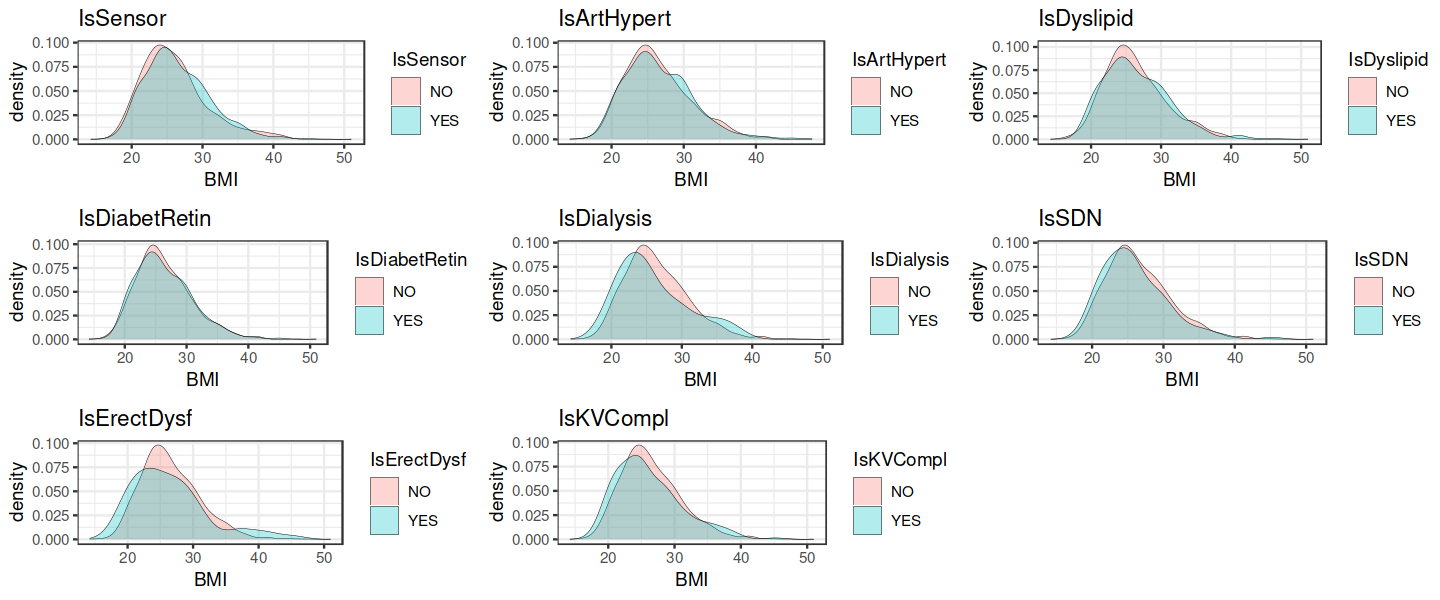

In [8]:
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
options(repr.plot.width=12, repr.plot.height=5)
p <- list()

density_fun <- function(col) {
    
    plot <- df_selected %>% 
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(BMI, fill=!!sym(col))) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() + 
    labs(title=col)
    
    return(plot)
}

plot <- map(is_cols, density_fun)
do.call(grid.arrange, plot)

In [6]:
is_cols_test <- c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

t.test_fun <- function(col, w=8, h=8) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    p <- df_selected %>% 
        filter(!!sym(col) %in% c('YES', 'NO'))%>%
        summarise(pval = round(wilcox.test(BMI  ~ !!sym(col), var.equal = TRUE)$p.value,2)) %>%
        pull(pval)
    
    return(paste(col, ', pval=', p))
}

map(is_cols_test, t.test_fun)

[[1]]
[1] "IsArtHypert , pval= 0.48"

[[2]]
[1] "IsDyslipid , pval= 0.71"

[[3]]
[1] "IsDiabetRetin , pval= 0.77"

[[4]]
[1] "IsDialysis , pval= 0.2"

[[5]]
[1] "IsSDN , pval= 0.11"

[[6]]
[1] "IsErectDysf , pval= 0.29"

[[7]]
[1] "IsKVCompl , pval= 0.13"

#### Pumpa VS Pera

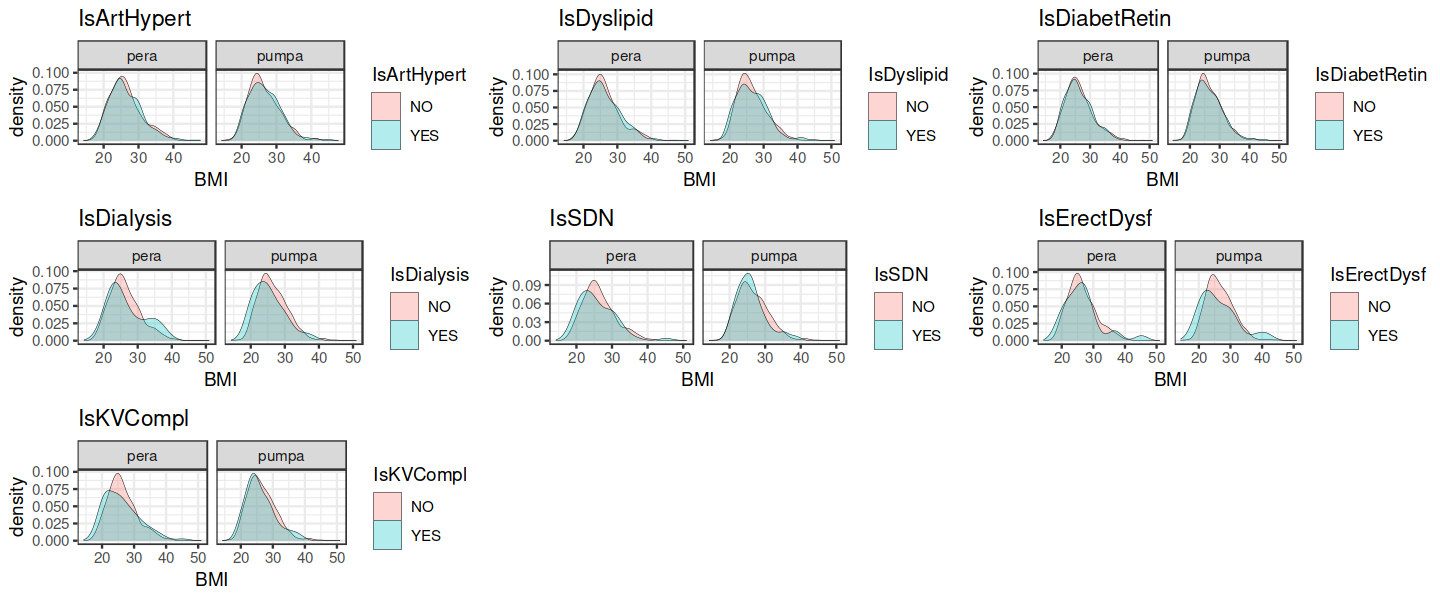

In [440]:
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
options(repr.plot.width=12, repr.plot.height=5)
p <- list()

density_fun <- function(col) {
    
    plot <- df_selected %>% 
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(BMI, fill=!!sym(col))) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() + 
    labs(title=col) +
    # theme(legend.position="none") +
    facet_wrap(~DiabetTherapy)   
    
    return(plot)
}

plot <- map(is_cols, density_fun)
do.call(grid.arrange, plot)

In [447]:
is_cols_test <- c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

t.test_fun <- function(col, w=8, h=8, therapy) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    p <- df_selected %>% 
        filter(!!sym(col) %in% c('YES', 'NO'), DiabetTherapy==therapy)%>%
        summarise(pval = round(wilcox.test(BMI  ~ !!sym(col), var.equal = TRUE)$p.value,2)) %>%
        pull(pval)
    
    return(paste(col, ', pval=', p))
}

map(is_cols_test, t.test_fun, therapy='pera')
map(is_cols_test, t.test_fun, therapy='pumpa')

[[1]]
[1] "IsArtHypert , pval= 0.86"

[[2]]
[1] "IsDyslipid , pval= 0.54"

[[3]]
[1] "IsDiabetRetin , pval= 0.85"

[[4]]
[1] "IsDialysis , pval= 0.93"

[[5]]
[1] "IsSDN , pval= 0.19"

[[6]]
[1] "IsErectDysf , pval= 0.75"

[[7]]
[1] "IsKVCompl , pval= 0.36"

[[1]]
[1] "IsArtHypert , pval= 0.4"

[[2]]
[1] "IsDyslipid , pval= 0.94"

[[3]]
[1] "IsDiabetRetin , pval= 0.86"

[[4]]
[1] "IsDialysis , pval= 0.09"

[[5]]
[1] "IsSDN , pval= 0.28"

[[6]]
[1] "IsErectDysf , pval= 0.26"

[[7]]
[1] "IsKVCompl , pval= 0.2"

#### Sensor (Y VS N)

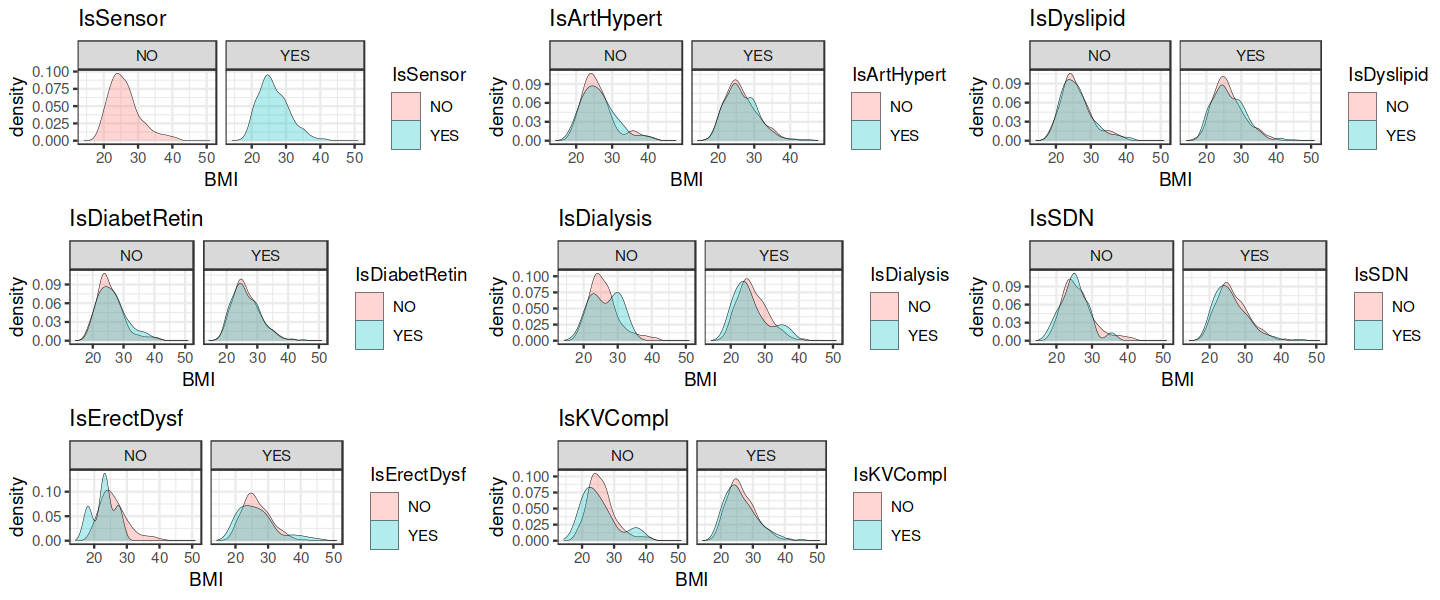

In [123]:
options(repr.plot.width=12, repr.plot.height=5)
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

density_fun <- function(col) {
    
    plot <- df_selected %>% 
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(BMI, fill=!!sym(col))) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() + 
    labs(title=col) +
    # theme(legend.position="none") +
    facet_wrap(~IsSensor)   
    
    return(plot)
}

plot <- map(is_cols, density_fun)
do.call(grid.arrange, plot)

In [104]:
is_cols_test <- c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

t.test_fun <- function(col, w=8, h=8, sensor) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    p <- df_selected %>% 
        filter(!!sym(col) %in% c('YES', 'NO'), IsSensor==sensor)%>%
        summarise(pval = round(wilcox.test(BMI  ~ !!sym(col), var.equal = TRUE)$p.value,2)) %>%
        pull(pval)
    
    return(paste(col, ', pval=', p))
}

map(is_cols_test, t.test_fun, sensor='YES')
map(is_cols_test, t.test_fun, sensor='NO')

[[1]]
[1] "IsArtHypert , pval= 0.45"

[[2]]
[1] "IsDyslipid , pval= 0.58"

[[3]]
[1] "IsDiabetRetin , pval= 0.59"

[[4]]
[1] "IsDialysis , pval= 0.15"

[[5]]
[1] "IsSDN , pval= 0.19"

[[6]]
[1] "IsErectDysf , pval= 0.45"

[[7]]
[1] "IsKVCompl , pval= 0.25"

[[1]]
[1] "IsArtHypert , pval= 0.69"

[[2]]
[1] "IsDyslipid , pval= 0.94"

[[3]]
[1] "IsDiabetRetin , pval= 0.34"

[[4]]
[1] "IsDialysis , pval= 0.73"

[[5]]
[1] "IsSDN , pval= 0.55"

[[6]]
[1] "IsErectDysf , pval= 0.21"

[[7]]
[1] "IsKVCompl , pval= 0.23"

#### Sensor Type

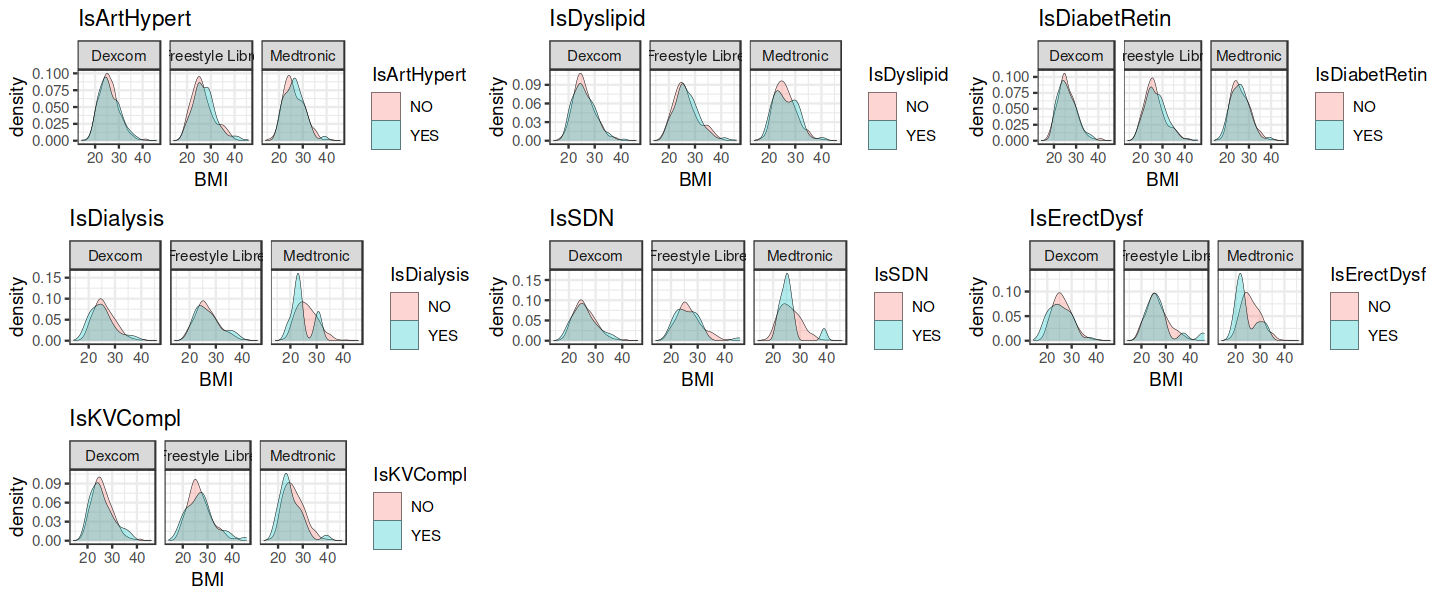

In [14]:
options(repr.plot.width=12, repr.plot.height=5)
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

density_fun <- function(col) {
    
    plot <- df_selected %>%
    filter(!is.na(SensorType), SensorType!='Glunovo', SensorType!='Medtrum') %>% 
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(BMI, fill=!!sym(col))) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() + 
    labs(title=col) +
    # theme(legend.position="none") +
    facet_wrap(~SensorType)   
    
    return(plot)
}

plot <- map(is_cols, density_fun)
do.call(grid.arrange, plot)

In [135]:
is_cols_test <- c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
p <- list()

t.test_fun <- function(col, w=8, h=8, type) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    p <- df_selected %>% 
        filter(!!sym(col) %in% c('YES', 'NO'), SensorType==type)%>%
        summarise(pval = round(wilcox.test(BMI  ~ !!sym(col), var.equal = TRUE)$p.value,2)) %>%
        pull(pval)
    
    return(paste(col, ', pval=', p))
}

map(is_cols_test, t.test_fun, type='Dexcom')
map(is_cols_test, t.test_fun, type='Medtronic')
map(is_cols_test, t.test_fun, type='Freestyle Libre')

[[1]]
[1] "IsArtHypert , pval= 0.94"

[[2]]
[1] "IsDyslipid , pval= 0.99"

[[3]]
[1] "IsDiabetRetin , pval= 0.98"

[[4]]
[1] "IsDialysis , pval= 0.21"

[[5]]
[1] "IsSDN , pval= 0.76"

[[6]]
[1] "IsErectDysf , pval= 0.18"

[[7]]
[1] "IsKVCompl , pval= 0.43"

[[1]]
[1] "IsArtHypert , pval= 0.52"

[[2]]
[1] "IsDyslipid , pval= 0.75"

[[3]]
[1] "IsDiabetRetin , pval= 0.66"

[[4]]
[1] "IsDialysis , pval= 0.15"

[[5]]
[1] "IsSDN , pval= 0.52"

[[6]]
[1] "IsErectDysf , pval= 0.11"

[[7]]
[1] "IsKVCompl , pval= 0.07"

[[1]]
[1] "IsArtHypert , pval= 0.03"

[[2]]
[1] "IsDyslipid , pval= 0.15"

[[3]]
[1] "IsDiabetRetin , pval= 0.09"

[[4]]
[1] "IsDialysis , pval= 0.93"

[[5]]
[1] "IsSDN , pval= 0.56"

[[6]]
[1] "IsErectDysf , pval= 0.98"

[[7]]
[1] "IsKVCompl , pval= 0.59"

#### chytré pumpy VS  hloupé

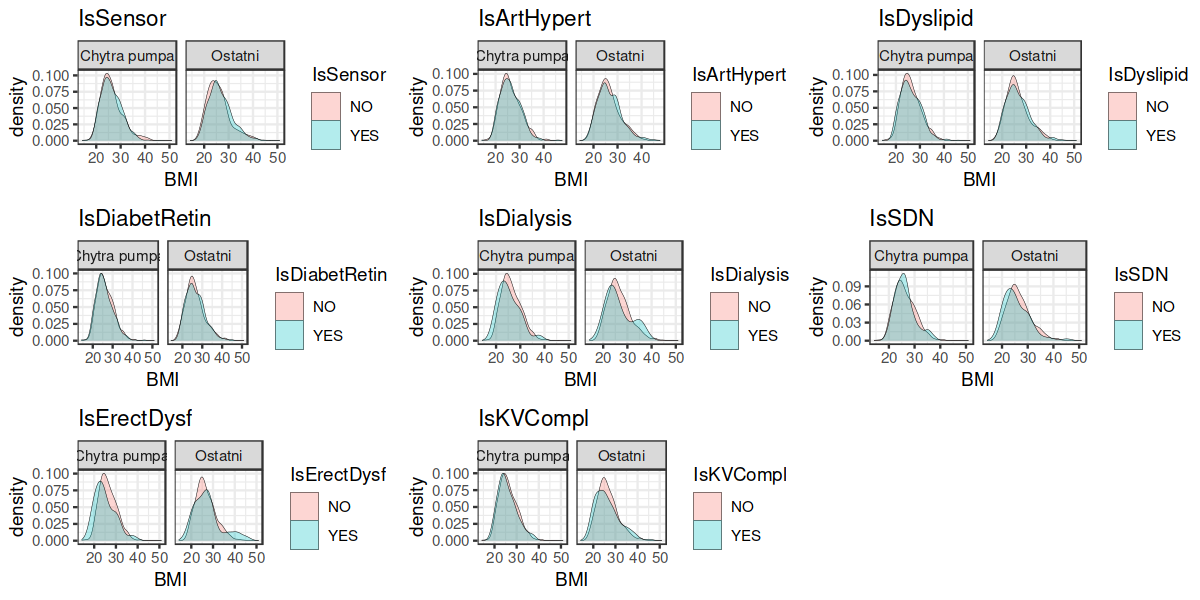

In [73]:
is_cols <- c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')
options(repr.plot.width=10, repr.plot.height=5)
p <- list()

density_fun <- function(col) {
    
    plot <- df_selected %>% 
    mutate(chytra_pumpa = ifelse(chytra_pumpa==1, 'Chytra pumpa', 'Ostatni')) %>%
    filter(!!sym(col) %in% c('YES', 'NO')) %>%
    ggplot(aes(BMI, fill=!!sym(col))) +
    geom_density(alpha = 0.3, size = 0.1) +
    theme_bw() + 
    labs(title=col) +
    # theme(legend.position="none") +
    facet_wrap(~chytra_pumpa)   
    
    return(plot)
}

plot <- map(is_cols, density_fun)
do.call(grid.arrange, plot)

In [31]:
is_cols_test <- c('IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsKVCompl')
p <- list()

t.test_fun <- function(col, w=8, h=8, type) {
    options(repr.plot.width=w, repr.plot.height=h)
    
    p <- df_selected %>% 
        filter(!!sym(col) %in% c('YES', 'NO'), chytra_pumpa==type)%>%
        summarise(pval = round(t.test(BMI  ~ !!sym(col), var.equal = TRUE)$p.value, 2)) %>%
        pull(pval)
    
    return(paste(col, ', pval=', p))
}

map(is_cols_test, t.test_fun, type=1)
map(is_cols_test, t.test_fun, type=0)

[[1]]
[1] "IsArtHypert , pval= 0.87"

[[2]]
[1] "IsDyslipid , pval= 0.73"

[[3]]
[1] "IsDiabetRetin , pval= 0.24"

[[4]]
[1] "IsDialysis , pval= 0.25"

[[5]]
[1] "IsSDN , pval= 0.94"

[[6]]
[1] "IsKVCompl , pval= 0.42"

[[1]]
[1] "IsArtHypert , pval= 0.29"

[[2]]
[1] "IsDyslipid , pval= 0.25"

[[3]]
[1] "IsDiabetRetin , pval= 0.66"

[[4]]
[1] "IsDialysis , pval= 0.91"

[[5]]
[1] "IsSDN , pval= 0.11"

[[6]]
[1] "IsKVCompl , pval= 0.62"

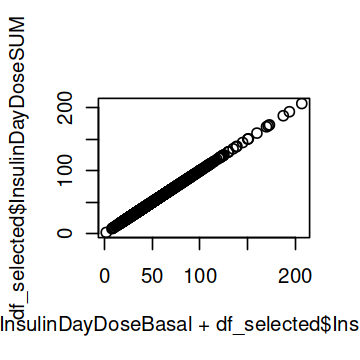

In [335]:
options(repr.plot.width=3, repr.plot.height=3)

plot(df_selected$InsulinDayDoseBasal+df_selected$InsulinDayDoseBolus, df_selected$InsulinDayDoseSUM)

### Regression

In [352]:
summary(lm(BMI~.-TBR-InsulinDayDoseSUM, df_selected%>%select(-BMI_char)))


Call:
lm(formula = BMI ~ . - TBR - InsulinDayDoseSUM, data = df_selected %>% 
    select(-BMI_char))

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7133  -3.2127  -0.5527   2.7332  20.6655 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         27.009125   3.415851   7.907  6.1e-15 ***
DiabetTherapypumpa   0.147107   0.267447   0.550    0.582    
LabGH                0.004565   0.015009   0.304    0.761    
TIR                 -0.018926   0.029965  -0.632    0.528    
TAR                 -0.024088   0.035161  -0.685    0.493    
SensGlucoseAVG       0.112644   0.181826   0.620    0.536    
SensGlucoseCV        0.001776   0.018762   0.095    0.925    
InsulinDayDoseBolus -0.010248   0.014028  -0.731    0.465    
InsulinDayDoseBasal  0.007194   0.014496   0.496    0.620    
InsulinSensFactor    0.043920   0.204561   0.215    0.830    
InsulinCarboRatio   -0.019018   0.021460  -0.886    0.376    
IsArtHypertYES       0.196327   0.3

In [87]:
df_lm <- df %>%
    filter(SensorType!='Glunovo', SensorType!='Medtrum') %>%
    select(BMI, DiabetTherapy,IsSensor, age, 'LabGH', 'TIR', 'TAR', 'TBR', 'SensGlucoseAVG', 'SensGlucoseCV', 'InsulinDayDoseSUM', 'InsulinDayDoseBolus', 'InsulinDayDoseBasal', 'InsulinSensFactor', 
           'InsulinCarboRatio', 'IsArtHypert', 'IsDyslipid', 'IsDiabetRetin', 'IsDialysis', 'IsSDN', 'IsErectDysf', 'IsKVCompl', 'LabGF', 'SensorType') %>%
    mutate(LabGH = ifelse(LabGH>100, LabGH/10, LabGH),
           LabGF = ifelse(LabGF>50, LabGH/10, LabGF),
           TBR = ifelse(TBR>40, TBR/10, TBR),
           InsulinCarboRatio = ifelse(InsulinCarboRatio>50, InsulinCarboRatio/10, InsulinCarboRatio),
           InsulinSensFactor = ifelse(InsulinSensFactor>40, InsulinSensFactor/10, InsulinSensFactor)) %>%
    as.data.frame() %>%
    mutate(across(starts_with('Is'), ~ ifelse(. =='NA', NA, .)))

summary(lm(BMI~.+DiabetTherapy*LabGH-TBR-InsulinDayDoseSUM, df_lm))


Call:
lm(formula = BMI ~ . + DiabetTherapy * LabGH - TBR - InsulinDayDoseSUM, 
    data = df_lm)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.9111  -3.0107  -0.4366   2.6962  18.8436 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               22.4925224  3.8330396   5.868 6.00e-09 ***
DiabetTherapypumpa         0.5212658  1.3845349   0.376    0.707    
IsSensorYES                0.6377949  0.6162780   1.035    0.301    
age                        0.0486336  0.0089626   5.426 7.22e-08 ***
LabGH                      0.0040403  0.0217346   0.186    0.853    
TIR                       -0.0067251  0.0353568  -0.190    0.849    
TAR                       -0.0015732  0.0417599  -0.038    0.970    
SensGlucoseAVG             0.0009926  0.1979138   0.005    0.996    
SensGlucoseCV              0.0125694  0.0200862   0.626    0.532    
InsulinDayDoseBolus       -0.0032990  0.0142742  -0.231    0.817    
InsulinDayDoseBasal     

#### Sensor type

In [68]:
lapply(df_selected %>%
           select(-BMI, -DiabetTherapy, -PumpType, -HybridClosCircType, -SensorType, -BMI_char, -chytra_pumpa) %>%
           select_if(is.numeric), 
       function(x) summary(lm(x~SensorType*BMI, df_selected)))

$mene_3

Call:
lm(formula = x ~ SensorType * BMI, data = df_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1455 -0.8781 -0.7790  0.2066 25.0784 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                    0.651210   0.407421   1.598    0.110
SensorTypeFreestyle Libre     -0.007324   0.612952  -0.012    0.990
SensorTypeGlunovo             27.265457  71.754437   0.380    0.704
SensorTypeMedtronic            0.180029   0.691925   0.260    0.795
SensorTypeMedtrum             -0.006131   1.852381  -0.003    0.997
BMI                            0.011910   0.015431   0.772    0.440
SensorTypeFreestyle Libre:BMI -0.005708   0.022843  -0.250    0.803
SensorTypeGlunovo:BMI         -0.845243   2.180643  -0.388    0.698
SensorTypeMedtronic:BMI       -0.013831   0.026042  -0.531    0.595
SensorTypeMedtrum:BMI                NA         NA      NA       NA

Residual standard error: 1.85 o

#### chytre pumpy

In [83]:
df_for_logit <- df_selected %>%
    mutate_if(is.character, function(x) ifelse(x=='YES', 1, 0))

lapply(df_for_logit%>%select( c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')), function(y)
    summary(glm(y ~ chytra_pumpa*BMI, family = binomial(link='logit'), data = df_for_logit)))

$IsSensor

Call:
glm(formula = y ~ chytra_pumpa * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)       1.26639    0.56467   2.243   0.0249 *
chytra_pumpa      1.14126    0.94012   1.214   0.2248  
BMI               0.03691    0.02148   1.718   0.0858 .
chytra_pumpa:BMI -0.04159    0.03545  -1.173   0.2407  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1282.4  on 2042  degrees of freedom
Residual deviance: 1279.2  on 2039  degrees of freedom
AIC: 1287.2

Number of Fisher Scoring iterations: 5


$IsArtHypert

Call:
glm(formula = y ~ chytra_pumpa * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)      -0.61376    0.32338  -1.898   0.0577 .
chytra_pumpa      0.21797    0.55177   0.395   0.6928

In [43]:
lapply(df_selected %>%
           select(-BMI, -DiabetTherapy, -PumpType, -HybridClosCircType, -SensorType, -BMI_char, -chytra_pumpa)%>%
           select_if(is.numeric), 
       function(x) summary(lm(x~chytra_pumpa*BMI, df_selected)))

$mene_3

Call:
lm(formula = x ~ chytra_pumpa * BMI, data = df_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9287 -0.8121 -0.7609  0.2222 25.0985 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)       0.666546   0.294344   2.265   0.0237 *
chytra_pumpa      0.307573   0.494655   0.622   0.5342  
BMI               0.004031   0.010876   0.371   0.7110  
chytra_pumpa:BMI -0.007232   0.018497  -0.391   0.6959  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.781 on 1929 degrees of freedom
  (110 observations deleted due to missingness)
Multiple R-squared:  0.001131,	Adjusted R-squared:  -0.0004227 
F-statistic: 0.7279 on 3 and 1929 DF,  p-value: 0.5353


$`3-3.9`

Call:
lm(formula = x ~ chytra_pumpa * BMI, data = df_selected)

Residuals:
   Min     1Q Median     3Q    Max 
-3.397 -2.138 -1.111  0.897 75.866 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercep

#### Sensor

In [84]:
df_for_logit <- df_selected %>%
    mutate_if(is.character, function(x) ifelse(x=='YES', 1, 0))

lapply(df_for_logit%>%select( c('IsSensor', 'IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')), function(y)
    summary(glm(y ~ IsSensor*BMI, family = binomial(link='logit'), data = df_for_logit)))

Warning message:
“glm.fit: algorithm did not converge”


$IsSensor

Call:
glm(formula = y ~ IsSensor * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)  -2.657e+01  1.481e+05       0        1
IsSensor      5.313e+01  1.559e+05       0        1
BMI          -2.495e-23  5.608e+03       0        1
IsSensor:BMI -6.184e-09  5.890e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.2824e+03  on 2042  degrees of freedom
Residual deviance: 1.1853e-08  on 2039  degrees of freedom
AIC: 8

Number of Fisher Scoring iterations: 25


$IsArtHypert

Call:
glm(formula = y ~ IsSensor * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.46844    0.84628  -0.554    0.580
IsSensor     -0.15327    0.89022  -0.172    0.863
BMI           0.02679    0.03214   0.834    0.404
IsSensor:BMI -0.01716    0.03374  -0.508    0.611

(Disp

In [64]:
# 16 regressions

lapply(df_selected %>%
           select(-BMI, -DiabetTherapy, -PumpType, -HybridClosCircType, -SensorType, -BMI_char, -chytra_pumpa, -InsulinDayDoseSUM)%>%
           select_if(is.numeric), 
       function(x) summary(lm(x~IsSensor*BMI, df_selected)))

$mene_3

Call:
lm(formula = x ~ IsSensor * BMI, data = df_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9380 -0.7391 -0.7289  0.2641 25.2575 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      0.36070    1.01483   0.355   0.7223  
IsSensorYES      0.42060    1.04215   0.404   0.6866  
BMI              0.07858    0.03825   2.054   0.0401 *
IsSensorYES:BMI -0.08028    0.03926  -2.045   0.0410 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.741 on 1929 degrees of freedom
  (110 observations deleted due to missingness)
Multiple R-squared:  0.0453,	Adjusted R-squared:  0.04382 
F-statistic: 30.51 on 3 and 1929 DF,  p-value: < 2.2e-16


$`3-3.9`

Call:
lm(formula = x ~ IsSensor * BMI, data = df_selected)

Residuals:
   Min     1Q Median     3Q    Max 
-6.066 -2.067 -1.055  0.949 76.028 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)      1.80440    2.259

#### Pumpa VS Pera

In [85]:
df_for_logit <- df_selected %>%
    mutate_if(is.character, function(x) ifelse(x=='YES', 1, 0))

lapply(df_for_logit%>%select( c('IsSensor','IsArtHypert','IsDyslipid','IsDiabetRetin','IsDialysis','IsSDN','IsErectDysf','IsKVCompl')), function(y)
    summary(glm(y ~ DiabetTherapy*BMI, family = binomial(link='logit'), data = df_for_logit)))

$IsSensor

Call:
glm(formula = y ~ DiabetTherapy * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients: (2 not defined because of singularities)
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.67634    0.44936   3.731 0.000191 ***
DiabetTherapy           NA         NA      NA       NA    
BMI                0.02203    0.01700   1.296 0.194892    
DiabetTherapy:BMI       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1282.4  on 2042  degrees of freedom
Residual deviance: 1280.7  on 2041  degrees of freedom
AIC: 1284.7

Number of Fisher Scoring iterations: 5


$IsArtHypert

Call:
glm(formula = y ~ DiabetTherapy * BMI, family = binomial(link = "logit"), 
    data = df_for_logit)

Coefficients: (2 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)  
(Interce

In [66]:
# 16 regressions

lapply(df_selected %>%
           select(-BMI, -DiabetTherapy, -PumpType, -HybridClosCircType, -SensorType, -BMI_char, -chytra_pumpa, -InsulinDayDoseSUM) %>%
           select_if(is.numeric), 
       function(x) summary(lm(x~DiabetTherapy*BMI, df_selected)))

$mene_3

Call:
lm(formula = x ~ DiabetTherapy * BMI, data = df_selected)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1591 -0.8411 -0.7355  0.2027 25.0878 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)             0.37358    0.33282   1.122   0.2618  
DiabetTherapypumpa      0.84902    0.47202   1.799   0.0722 .
BMI                     0.01540    0.01241   1.241   0.2147  
DiabetTherapypumpa:BMI -0.02908    0.01757  -1.655   0.0982 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.78 on 1929 degrees of freedom
  (110 observations deleted due to missingness)
Multiple R-squared:  0.001923,	Adjusted R-squared:  0.0003706 
F-statistic: 1.239 on 3 and 1929 DF,  p-value: 0.2941


$`3-3.9`

Call:
lm(formula = x ~ DiabetTherapy * BMI, data = df_selected)

Residuals:
   Min     1Q Median     3Q    Max 
-3.579 -2.188 -1.122  0.895 75.743 

Coefficients:
                       Estimate Std. Error 